<a href="https://colab.research.google.com/github/LilianeEff/Data110/blob/main/FinalProjectData110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Final Project**
Liliane Effoudou

Data 110

The Fatal Police Shootings Dataset was collected between 2015 and 2024, and logs everyone shot and killed by a law enforcement officer throughout the United States.

In [81]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import folium
from folium.plugins import HeatMap
import seaborn as sns
df=pd.read_csv('https://raw.githubusercontent.com/LilianeEff/Data110/refs/heads/main/Dataset/fatal-police-shootings-data.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/LilianeEff/Data110/refs/heads/main/Dataset/Populationdataset.csv')
df.head()


,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


In [14]:
# Drop the columns I don't need
columns_to_drop = ['location_precision', 'race_source', 'id']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.head()

,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,name,age,gender,race,was_mental_illness_related,body_camera,agency_ids
0,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,Tim Elliot,53.0,male,A,True,False,73
1,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,Lewis Lee Lembke,47.0,male,W,False,False,70
2,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,John Paul Quintero,23.0,male,H,False,False,238
3,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,Matthew Hoffman,32.0,male,W,True,False,196
4,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,Michael Rodriguez,39.0,male,H,False,False,473


In [15]:
#Remove all missing values
df=df.dropna()
df.head()

,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,name,age,gender,race,was_mental_illness_related,body_camera,agency_ids
0,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,Tim Elliot,53.0,male,A,True,False,73
1,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,Lewis Lee Lembke,47.0,male,W,False,False,70
2,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,John Paul Quintero,23.0,male,H,False,False,238
3,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,Matthew Hoffman,32.0,male,W,True,False,196
4,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,Michael Rodriguez,39.0,male,H,False,False,473


In [16]:
#Structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 0 to 9491
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        3500 non-null   object 
 1   threat_type                 3500 non-null   object 
 2   flee_status                 3500 non-null   object 
 3   armed_with                  3500 non-null   object 
 4   city                        3500 non-null   object 
 5   county                      3500 non-null   object 
 6   state                       3500 non-null   object 
 7   latitude                    3500 non-null   float64
 8   longitude                   3500 non-null   float64
 9   name                        3500 non-null   object 
 10  age                         3500 non-null   float64
 11  gender                      3500 non-null   object 
 12  race                        3500 non-null   object 
 13  was_mental_illness_related  3500 non-n

In [17]:
#Summary statistics of all numerical values of the first dataframe: df
df.describe()

,latitude,longitude,age
count,3500.000000,3.500000e+03,3500.000000
mean,36.484995,-2.573479e+12,37.045429
std,5.195800,1.522491e+14,12.776798
min,19.615968,-9.007175e+15,6.000000
25%,33.378178,-1.119330e+02,27.000000
50%,36.007438,-9.452585e+01,35.000000
75%,39.931972,-8.299420e+01,45.000000
max,71.301255,-6.801434e+01,91.000000


In [18]:
# top five data from the second dataframe, df2(census population from 2019), which I'm using as a point of reference for the racial makeup of the states.
df2.head()

,State,Total,White,Black,N.A.,Asian,N.H.P.I.,Hispanic,Mixed,BHW,HAW
0,Alabama,4876250,3320247,1299048,25565,66270,2238,70662,92220,6933,85287
1,Alaska,737068,476015,24205,109751,45920,9204,11308,60665,3011,57654
2,Arizona,7050299,5444453,317462,317414,233213,14458,460262,263037,50674,212363
3,Arkansas,2999370,2301044,459542,20434,45504,8733,83576,80537,7658,72879
4,California,39283497,23453222,2274108,303998,5692423,155290,5481792,1922664,414894,1507770


In [22]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   State     52 non-null     object
 1   Total     52 non-null     int64 
 2   White     52 non-null     int64 
 3   Black     52 non-null     int64 
 4   N.A.      52 non-null     int64 
 5   Asian     52 non-null     int64 
 6   N.H.P.I.  52 non-null     int64 
 7   Hispanic  52 non-null     int64 
 8   Mixed     52 non-null     int64 
 9   BHW       52 non-null     int64 
 10  HAW       52 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 4.6+ KB


,Total,White,Black,N.A.,Asian,N.H.P.I.,Hispanic,Mixed,BHW,HAW
count,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,5.200000e+01,52.000000,5.200000e+01,5.200000e+01,52.000000,5.200000e+01
mean,6.308005e+06,4.568571e+06,8.004100e+05,53018.865385,3.448163e+05,11541.096154,3.192718e+05,2.103760e+05,31562.538462,1.788134e+05
std,7.217198e+06,4.810843e+06,9.652418e+05,74407.805567,8.242890e+05,29115.800771,8.054823e+05,2.910041e+05,63023.997867,2.304388e+05
min,5.810240e+05,2.858570e+05,5.303000e+03,2036.000000,5.025000e+03,269.000000,2.410000e+03,1.260000e+04,428.000000,1.217200e+04
25%,1.792416e+06,1.560377e+06,7.041825e+04,14242.750000,3.612450e+04,1058.000000,3.791375e+04,5.052325e+04,5538.250000,4.461175e+04
50%,4.289428e+06,3.106261e+06,3.577215e+05,24350.500000,1.016970e+05,3140.500000,1.053705e+05,1.424900e+05,14557.000000,1.219335e+05
75%,7.138751e+06,5.560325e+06,1.351683e+06,55638.000000,3.283222e+05,8334.000000,2.780375e+05,2.677530e+05,29315.750000,2.314530e+05
max,3.928350e+07,2.345322e+07,3.428211e+06,317414.000000,5.692423e+06,155290.000000,5.481792e+06,1.922664e+06,414894.000000,1.507770e+06


In [21]:
race_mapping = {
    'A': 'Asian',
    'B': 'Black',
    'H': 'Hispanic',
    'N': 'N.A.',
    'O': 'Other',
    'W': 'White'
}

# Replacing the values in the race columns to make them more readable.
df['race'] = df['race'].replace(race_mapping)
df.head()

,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,name,age,gender,race,was_mental_illness_related,body_camera,agency_ids
0,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,Tim Elliot,53.0,male,Asian,True,False,73
1,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,Lewis Lee Lembke,47.0,male,White,False,False,70
2,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,John Paul Quintero,23.0,male,Hispanic,False,False,238
3,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,Matthew Hoffman,32.0,male,White,True,False,196
4,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,Michael Rodriguez,39.0,male,Hispanic,False,False,473


age
25.0    124
31.0    124
27.0    116
34.0    116
36.0    116
       ... 
80.0      1
91.0      1
13.0      1
12.0      1
88.0      1
Name: count, Length: 76, dtype: int64


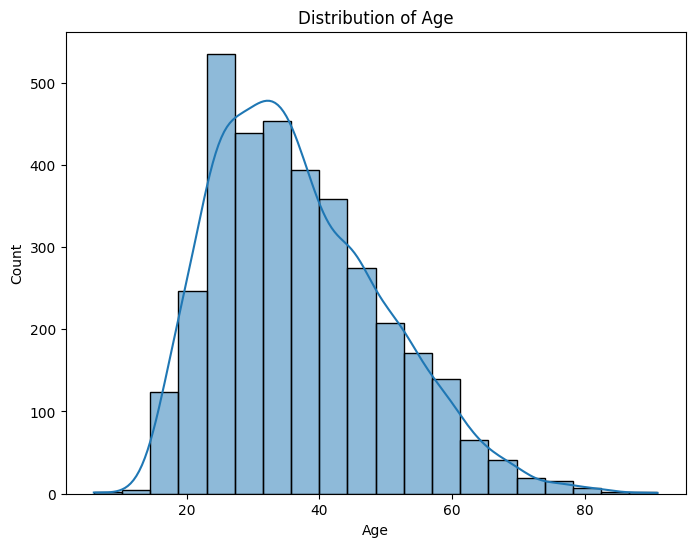

In [29]:
#What is the age most affected by fatal police shootings?
print(df['age'].value_counts())
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

From this dataset and graph, age 25 seems to be the most affected in fatal shootings.

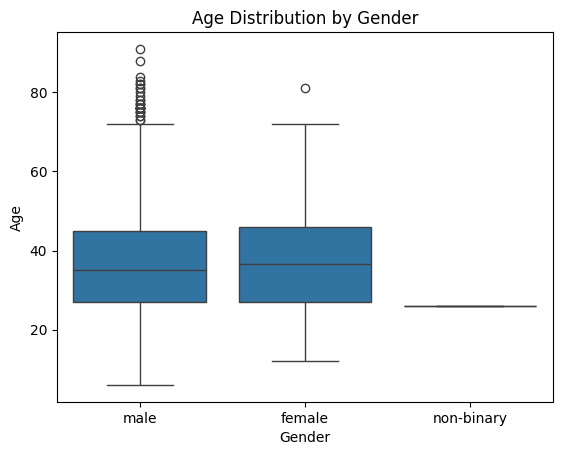

In [24]:
#Age distribution by gender, who is more affected based on their age and gender.
sns.boxplot(x='gender', y='age', data=df)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.show()

The median age for males is a little over 33, with far more instances, while for females is a little over 35, with fewer instances.

armed_with
gun                          2077
knife                         650
unarmed                       268
replica                       150
blunt_object                  105
undetermined                   84
vehicle                        60
other                          36
unknown                        34
gun;knife                      15
vehicle;gun                     7
other;gun                       3
knife;knife                     3
blunt_object;blunt_object       2
knife;blunt_object              2
gun;vehicle                     2
blunt_object;knife              1
vehicle;knife                   1
Name: count, dtype: int64


<ipython-input-60-38abedfb064c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Figure size 800x600 with 0 Axes>

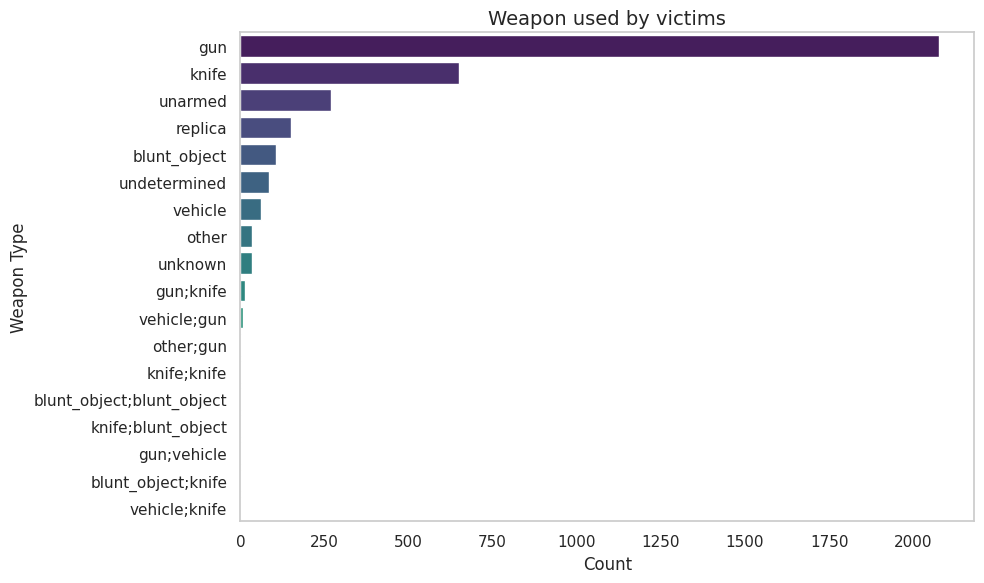

In [60]:
#What is the weapon most found on victims of police shootings?
print(df['armed_with'].value_counts())

df['armed_with'] = pd.Categorical(df['armed_with'], categories=df['armed_with'].value_counts().index)

plt.figure(figsize=(8, 6))
plt.figure(figsize=(10, 6))
sns.countplot(
    y='armed_with',
    data=df,
    palette='viridis'
)

plt.title('Weapon used by victims', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Weapon Type', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

Guns are disproportionally found on the victims when it comes to fatal police shootings. It would explain the high number of those fatalities, as the threat seems higher with such a weapon. Knives come second, understandably so, but the surprise here is the number of unarmed victims.

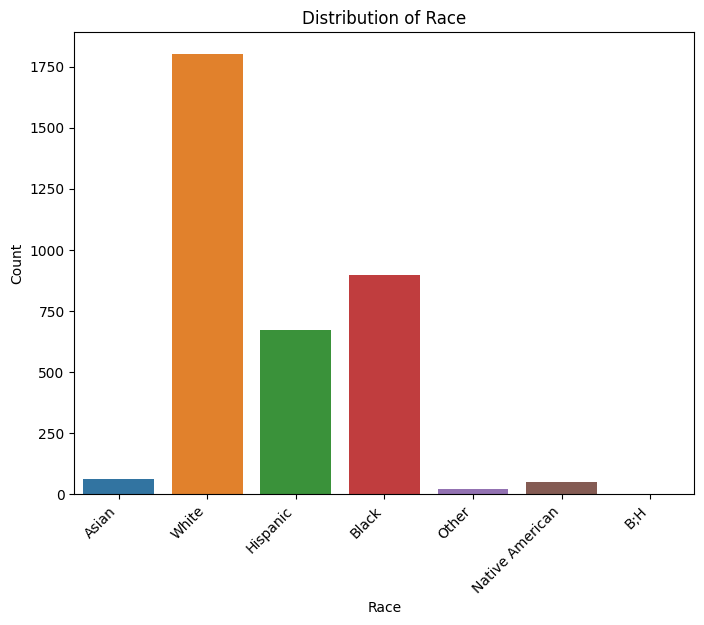

In [30]:
#Which race is the most affected?
plt.figure(figsize=(8, 6))
sns.countplot(x='race', data=df, hue='race')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

According to the police shooting dataset, by racial distribution, whites have the most amount of deaths in this category, followed by blacks, hispanics, asians, then native americans. Why is that?

In [36]:
#Population based on racial percentages
race_columns = ['White', 'Black', 'N.A.', 'Asian','Hispanic']
race_counts = df2[race_columns].sum()  # Calculate sum for each race

# total population:
total_population = race_counts.sum()

# percentages for each race:
race_percentages = (race_counts / total_population) * 100

# Let's display the findings. Each number is represented by its percentage.
print(race_percentages)

White       75.065806
Black       13.151470
N.A.         0.871149
Asian        5.665648
Hispanic     5.245928
dtype: float64


Turns out when we look at the aggregated population as a whole, whites make up for more than 75% of the population, we could see how they would most likely have the higher numbers in police shootings.

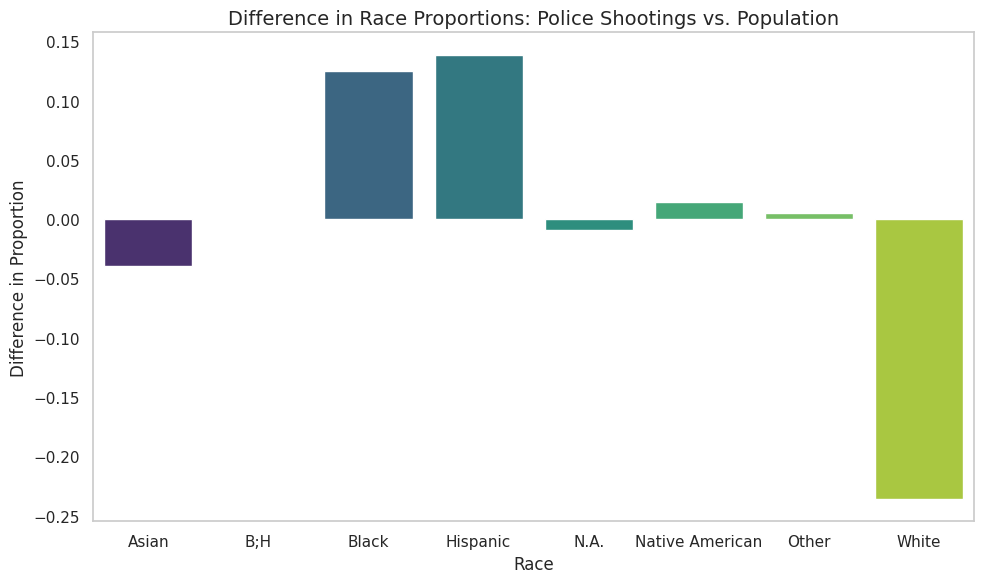

In [42]:
#I will plot two graphs to better demonstrate what the racial disparity
#in police shootings are laid out according to our datasets:

#race proportions in police shootings data (df)
race_counts_shootings = df['race'].value_counts()
race_proportions_shootings = race_counts_shootings / race_counts_shootings.sum()

#race proportions in population data (df2)
#Sum relevant columns for each race
race_counts_population = df2[['White', 'Black', 'N.A.', 'Asian', 'Hispanic']].sum()
race_proportions_population = race_counts_population / race_counts_population.sum()

#DataFrame to compare proportions
race_comparison = pd.DataFrame({
    'Shootings Proportion': race_proportions_shootings,
    'Population Proportion': race_proportions_population
})

# Renaming columns in race_comparison to match the race categories in df
race_comparison = race_comparison.rename(index={
    'White': 'White',
    'Black or African American': 'Black',
    'American Indian and Alaska Native': 'N.A.',
    'Asian': 'Asian',
    'Native Hawaiian and Other Pacific Islander': 'Other'
})


# Reindex to ensure all races are included (even if missing in one dataset)
all_races = race_proportions_shootings.index.union(race_proportions_population.index)
race_comparison = race_comparison.reindex(all_races)

# Fill NaN values with 0 (ensure that missing data would still be applied)
race_comparison = race_comparison.fillna(0)

#difference between shooting and population proportions
race_comparison['Difference'] = race_comparison['Shootings Proportion'] - race_comparison['Population Proportion']
plt.figure(figsize=(10, 6))
sns.barplot(
    x=race_comparison.index,
    y=race_comparison['Difference'],
    hue=race_comparison.index,
    palette='viridis',
)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Difference in Proportion', fontsize=12)
plt.title('Difference in Race Proportions: Police Shootings vs. Population', fontsize=14)
plt.tight_layout()
plt.grid(False)
plt.show()


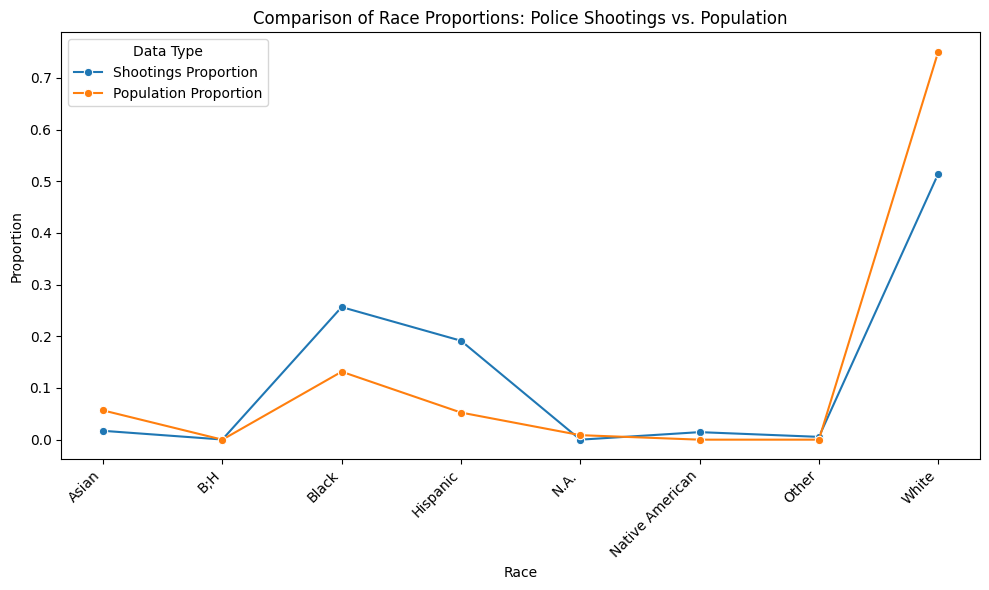

In [35]:
melted_data = race_comparison[['Shootings Proportion', 'Population Proportion']].reset_index().melt(id_vars='index', var_name='Data Type', value_name='Proportion')
plt.figure(figsize=(10, 6))
sns.lineplot(x='index', y='Proportion', hue='Data Type', data=melted_data, marker='o')
plt.xlabel('Race')
plt.ylabel('Proportion')
plt.title('Comparison of Race Proportions: Police Shootings vs. Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

According to the differences in proportion of race in the country, there seems to be a major overrepresentation in the black and hispanic communities when it comes to fatal police shootings,and a significant underrepresentation in the white community.

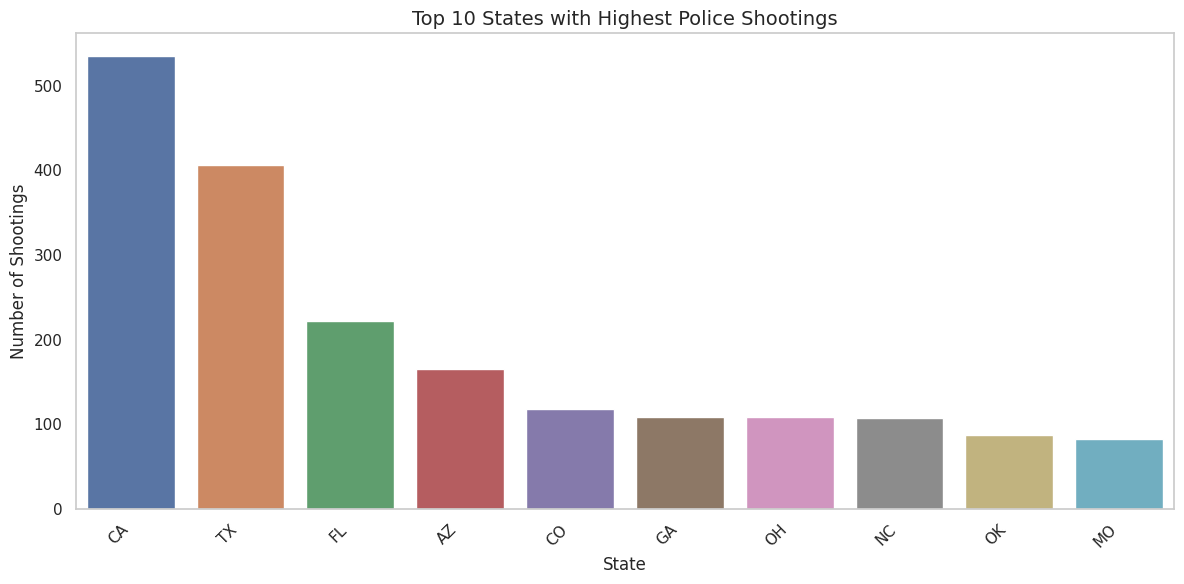

In [47]:
#Let's find out if this is a state issue(regional)

# Group data by state and count shootings
state_shootings = df.groupby('state')['name'].count().reset_index()
state_shootings.columns = ['State', 'Shootings']

# Sort by shootings in descending order
state_shootings = state_shootings.sort_values(by='Shootings', ascending=False)

# Get the top 10 states
top_10_states = state_shootings.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Shootings', data=top_10_states, order=top_10_states['State'], hue='State')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Shootings', fontsize=12)
plt.title('Top 10 States with Highest Police Shootings', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.grid(False)
plt.show()

In [51]:
population_columns = ['White', 'Black', 'Asian', 'Hispanic', 'N.A.']

state_populations = df2.groupby('State')[population_columns].sum()

#total population for each state:
state_populations['Total_Population'] = state_populations.sum(axis=1)

top_10_states_by_population = state_populations.sort_values(by='Total_Population', ascending=False).head(10)

# 2. Print the top 10 states:
print(top_10_states_by_population[['Total_Population']])

                Total_Population
State                           
California              37205543
Texas                   27474153
Florida                 20316962
New York                18947241
Pennsylvania            12467458
Illinois                12437708
Ohio                    11316091
Georgia                 10131702
North Carolina           9984387
Michigan                 9670907


The three most populous states in the country also account for the most police shootings, so we can infer that the higher the population, the more instances for fatal police killings.

In [63]:
state_shootings = df.groupby('state').size().reset_index(name='Shooting Count')

# View the result
print(state_shootings.head())

  state  Shooting Count
0    AK              16
1    AL              62
2    AR              33
3    AZ             165
4    CA             535


In [61]:
state_shootings = df.groupby('state')[['latitude', 'longitude']].mean().reset_index()  # Assuming you

                Total_Black
State                      
Texas               3428211
Florida             3359031
Georgia             3289020
New York            3065471
California          2274108
North Carolina      2200761
Illinois            1813590
Maryland            1799094
Virginia            1621592
Louisiana           1502963


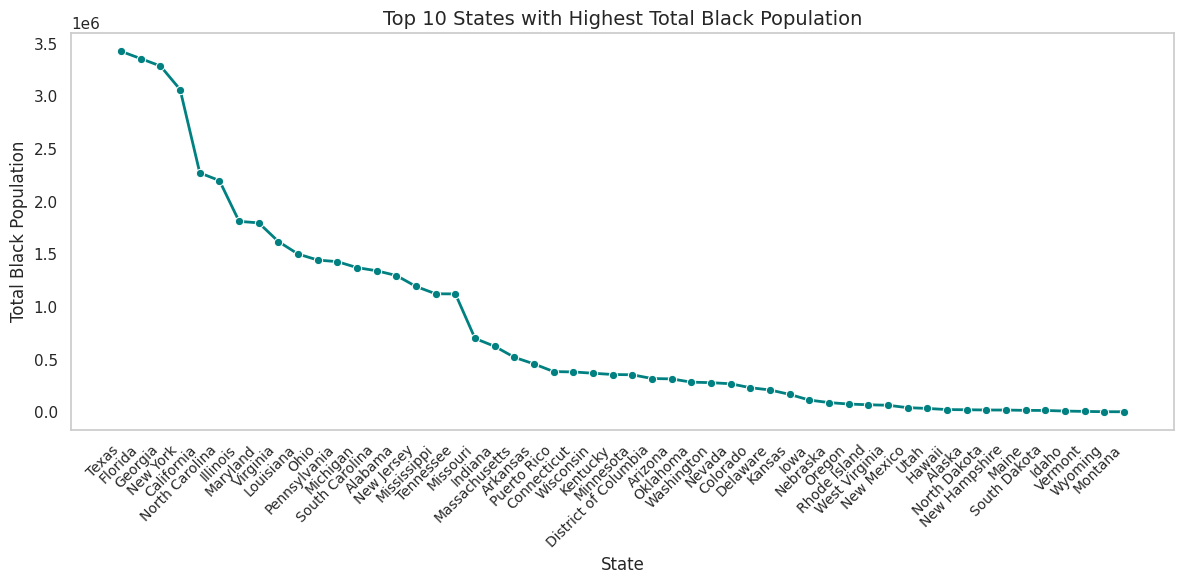

In [77]:
# Calculate the total Black and Hispanic population for each state
state_race_counts = df2.groupby('State')[['Black']].sum()

# Create a new column for total Black and Hispanic population
state_race_counts['Total_Black'] = state_race_counts['Black']

# Sort states by total Black and Hispanic population in descending order
top_states_black = state_race_counts.sort_values(by='Total_Black', ascending=False)

# Print the top states
print(top_states_black[['Total_Black']].head(10))  # Displaying top 10 states

import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme for better aesthetics
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='State',
    y='Total_Black',
    data=top_states_black,
    marker='o',  # Add markers for better visibility of data points
    linewidth=2,  # Adjust line thickness for clarity
    color='teal'  # Use a consistent and appealing color
)

# Add labels and title with enhanced font sizes
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Black Population', fontsize=12)
plt.title('Top 10 States with Highest Total Black Population', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.grid(False)
plt.show()


                Total_Hispanic
State                         
California             5481792
New York               1694965
Texas                  1643869
Illinois                757231
Florida                 625079
New Jersey              558665
Puerto Rico             554764
Arizona                 460262
Washington              333038
North Carolina          316763


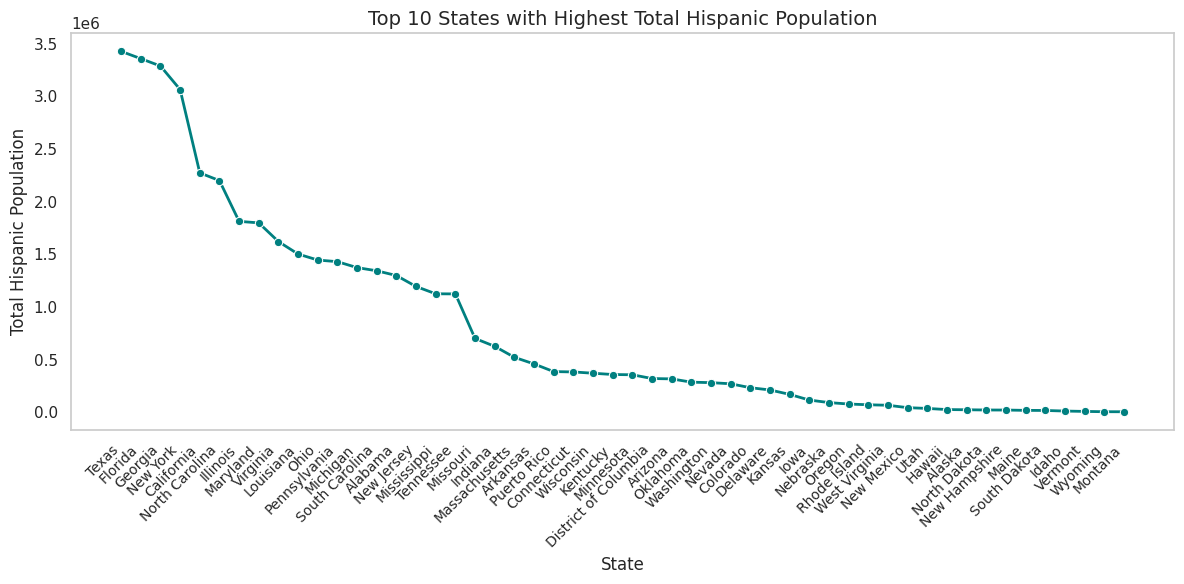

In [76]:
# Calculate the total Black and Hispanic population for each state
state_race_counts = df2.groupby('State')[['Hispanic']].sum()

# Create a new column for total Black and Hispanic population
state_race_counts['Total_Hispanic'] = state_race_counts['Hispanic']
# Sort states by total Black and Hispanic population in descending order
top_states_hispanic = state_race_counts.sort_values(by='Hispanic', ascending=False)

# Print the top states
print(top_states_hispanic[['Total_Hispanic']].head(10))  # Displaying top 10 states

import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme for better aesthetics
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='State',
    y='Total_Black',
    data=top_states_black,
    marker='o',  # Add markers for better visibility of data points
    linewidth=2,  # Adjust line thickness for clarity
    color='teal'  # Use a consistent and appealing color
)

# Add labels and title with enhanced font sizes
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Hispanic Population', fontsize=12)
plt.title('Top 10 States with Highest Total Hispanic Population', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Automatically adjust layout for better spacing
plt.tight_layout()
plt.grid(False)
# Show the plot
plt.show()


Unsurprisingly, the states with the highest fatal police shootings also have the highest number of black and  hispanic people. Population in melting pot areas is a lot more diverse, and usually larger than most other places, this could account for that.

In [82]:
location_data = df.groupby(['latitude', 'longitude']).size().reset_index(name='Shooting Count')

# Create the interactive heatmap using Plotly
fig = px.density_mapbox(location_data,
                        lat='latitude',
                        lon='longitude',
                        z='Shooting Count',  # Use the count of shootings at each location
                        radius=10,  # Controls the spread of the heatmap
                        center=dict(lat=37.0902, lon=-95.7129),  # Center on the US
                        zoom=3,  # Adjust zoom level based on your data
                        mapbox_style="carto-positron",  # Background style
                        title="Interactive Heatmap of Fatal Police Shootings")

# Show the heatmap
fig.show()